# Projekt SSN (Sztuczne sieci neuronowe)
### Autorzy: Aleksander Folfas, Zosia Jaworska, Maciej Komosa, Kajetan Łodej, Natalia Łyś

### Opis
Projekt ma na celu wykorzystanie sztucznych sieci neuronowych do wyceny nieruchomości mieszkaniowych. Wykorzystany zostanie jeden z najbardziej popularnych typów sztucznych sieci neuronowych- MLP, czyli multilayer perceptron (perceptron wielowarstwowy). Prognozowanie ceny mieszkania odbywać się będzie na podstawie parametrów, takich jak powierzchnia nieruchomości, ilość sypialni, ilość łazienek, lokalizacja czy rok budowy. W projekcie, analizie zostanie też poddany wpływ różnych parametrów sieci neuronowej na skuteczność jej działania. Analiza ta może pomóc w znalezieniu struktury sieci, która pozwoli osiągnąć bardziej precyzyjne prognozy wartości nieruchomości.

### Przegląd literatury
W literaturze można znaleźć wiele rozwiązań powyżej opisanego problemu. W większości rozwiązań zmiennych objaśniających jest więcej niż w niniejszym projekcie i zazwyczaj wykorzystują one System Informacji Geograficznej, który pozwala na uzyskanie informacji o lokalizacji nieruchomości w przestrzeni.

•	Jasiński T., Bochenek A. Prognozowanie cen nieruchomości lokalowych za pomocą sztucznych sieci neuronowych. Studia i Prace WNEiZ US, nr 45/1. Szczecin 2016

Badanie dotyczyło mieszkań w Łodzi. Modelowanie w powyższym artykule zostało przeprowadzone z użyciem sieci jednokierunkowych dwu- oraz trójwarstwowych oraz o radialnych funkcjach bazowych (RBF). Prognozowanymi wartościami były zarówno ceny nieruchomości, jak i ceny za m2. Zbiór danych zawierał 130 obserwacji. Zmienne objaśniające użyte przez autorów to:  powierzchnia nieruchomości lokalowej, powierzchnia nieruchomości wraz z pomieszczeniami przynależnymi, przynależność piwnicy, liczba izb, liczba pokojów, kondygnacja, na której znajduje się nieruchomość, liczba kondygnacji w budynku, stan budynku, długość trasy samochodowej do kompleksu Manufaktura, szacowany czas przejazdu autem do kompleksu Manufaktura, minimum odległości nieruchomości od jednego z dwóch głównych centrów handlowo-rozrywkowych Łodzi, to jest kompleksu Manufaktura oraz Galerii Łódzkiej, odległość od placu Wolności, odległość od najbliższego obszaru zieleni.
Najlepsze wyniki zostały uzyskane w przypadku sieci MLP dwuwarstwowej. Błędy prognozy były stosunkowo niskie. Modele wyceniające wartość całej nieruchomości dawały lepsze prognozy niż modele prognozujące cenę za m2. Autorzy zwracają uwagę, że model może jedynie oszacować cenę nieruchomości, każdy przypadek wymaga indywidualnej korekty.

•	Garcia N., Gamez M., Alfaro E. ANN+GIS: An Automated System for Property Valuation., 2008

Badanie skupiało się na rozwiązaniu problemów, związanych z wyceną nieruchomości za pomocą SSN, wynikających z braku informacji lub nieliniowości zmiennych. Praca skupia się na podkreśleniu istotności lokalizacji, w jakiej znajduje się nieruchomość. Im dokładniej nieruchomość zostanie umiejscowiona w przestrzeni, tym lepszy będzie wynik. Autorzy rekomendują użycie Systemu Informacji Geograficznej, który pozwala na dokonanie bardziej jakościowej prognozy. Samo badanie dotyczyło mieszkań w Albacete. Zbiór danych zawierał 562 obserwacje. Modelowanie zostało przeprowadzone z użyciem sieci MLP oraz RBF. Z prognozowaniem najlepiej poradziła sobie sieć MLP o dwóch warstwach ukrytych o 14 neuronach w warstwie wejściowej - średni błąd prognozy był na poziomie jedynie 5,65%.

•	Mazur-Dudzińska A., Sztuczne sieci neuronowe w modelowaniu zjawisk zachodzących na rynku nieruchomości, 2014

Badanie dotyczy łódzkiego wtórnego rynku mieszkaniowego. Jego celem jest zastosowanie sieci neuronowych do przewidywania cen nieruchomości. Zbiór danych wynosił 240 obserwacji. Każda nieruchomość została zakwalifikowana do jednej z 4 grup cenowych, do klasyfikacji zostały wykorzystane jednokierunkowe sieci wielowarstwowe. Do modelowania został wykorzystany perceptron o jednej warstwie ukrytej (w warstwie wejściowej tyle neuronów, ile zmiennych wejściowych; w warstwie ukrytej 3 neurony; w warstwie wyjściowej 4 neurony odpowiadające grupom cenowym). Najlepsze wyniki (80% mieszkań zakwalifikowanych poprawnie) osiągnięto w modelu, w którym zmiennymi objaśniającymi były: powierzchnia mieszkania, liczba pokoi, rok budowy, posiadanie balkonu oraz ocena stanu technicznego. 


## Wstęp

In [85]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [86]:
# Wczytanie danych
housing = pd.read_csv("housing_price_dataset.csv")
housing.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


Zmienne w modelu:

- SquareFeet - powierzchnia w stopach kwadratowych
- Bedrooms - liczba sypialni
- Bathrooms - liczba łazienek
- Neighborhood - lokalizacja (miejska, podmiejska, wiejska)
- YearBuilt - rok budowy
- Price - cena

In [87]:
# Ziana Neighborhood na liczby
le = LabelEncoder()
housing["Neighborhood"] = le.fit_transform(housing["Neighborhood"])
housing.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


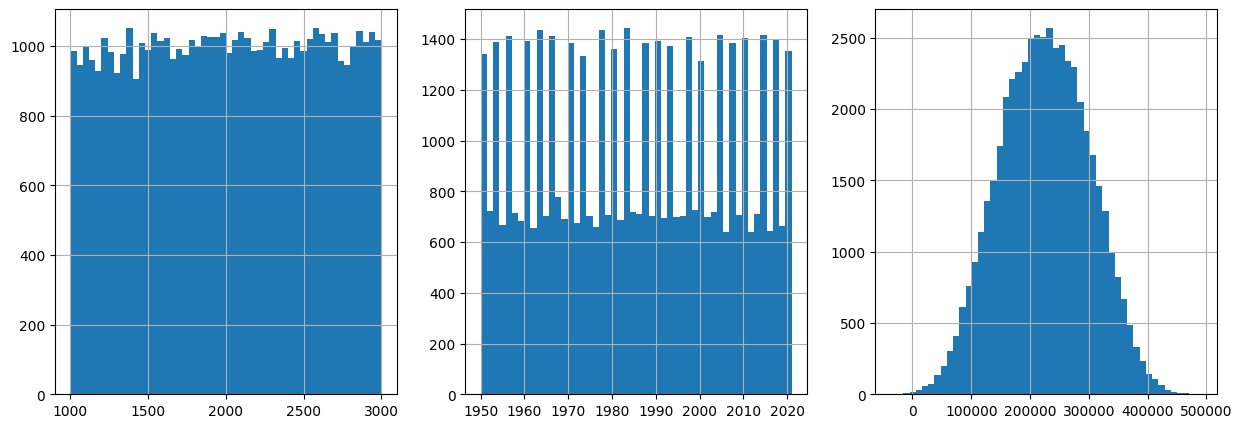

In [88]:
# Histogramy dla zmienny SquareFeet, YearBuilt, Price w grdzie 3x1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
housing['SquareFeet'].hist(ax=axes[0], bins=50)
housing['YearBuilt'].hist(ax=axes[1], bins=50)
housing['Price'].hist(ax=axes[2], bins=50)
plt.show()

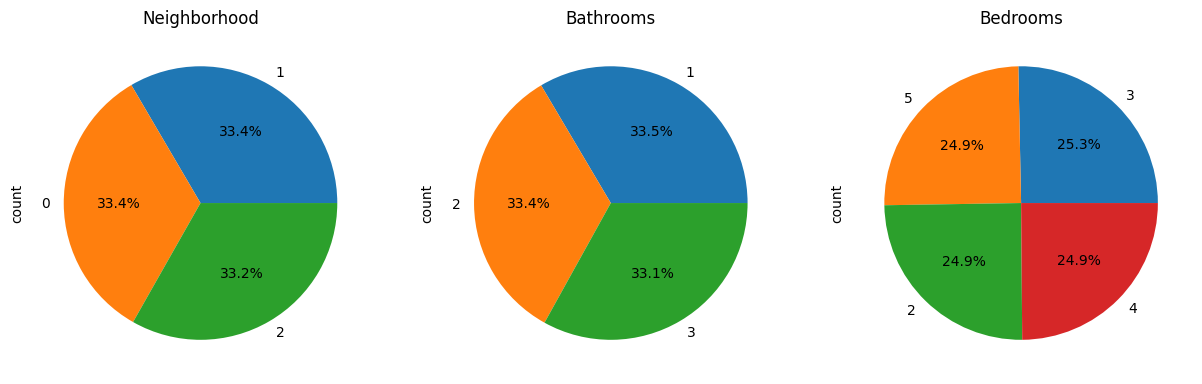

In [89]:
# Wykresy kołowe dla zmiennych: Neighborhood, Bathrooms, Bedrooms 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
housing['Neighborhood'].value_counts().plot(kind='pie', ax=axes[0], title = 'Neighborhood', autopct='%1.1f%%')
housing['Bathrooms'].value_counts().plot(kind='pie', ax=axes[1] , title = 'Bathrooms',  autopct='%1.1f%%')
housing['Bedrooms'].value_counts().plot(kind='pie', ax=axes[2], title = 'Bedrooms',  autopct='%1.1f%%')
plt.show()

Neighbourhood: 0 - Rural, 1 - Suburb, 2 - Urban

### Kod funkcji aktywacji

In [90]:
# Funkcja aktywacji logistyczna
def sigmoid(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji logistycznej
        return sigmoid(x) * (1 - sigmoid(x))
    # Funkcja logistyczna
    return 1 / (1 + np.exp(-x))

# Funkcja aktywacji tangensa hiperbolicznego
def tanh(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji tangensa hiperbolicznego
        return 1 - np.tanh(x)**2
    # Funkcja tangensa hiperbolicznego
    return np.tanh(x)

# Funkcja aktywacji softplus
def softplus(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji softplus
        return sigmoid(x)
    # Funkcja softplus
    return np.log(1 + np.exp(x))

# Funkcja aktywacji Exponential Linear Unit (ELU)
def elu(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji ELU
        return np.where(x > 0, 1, np.exp(x))
    # Funkcja ELU
    return np.where(x > 0, x, np.exp(x) - 1)

# Funkcja aktywacji Rectified Linear Unit (ReLU)
def relu(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji ReLU
        return np.where(x > 0, 1, 0)
    # Funkcja ReLU
    return np.maximum(0, x)

# Funkcja aktywacji Sigmoid Linear Unit (SiLU)
def silu(x, pochodna=False):
    sigmoid_x = sigmoid(x)
    if pochodna:
        # Pochodna funkcji SiLU
        return sigmoid_x + x * sigmoid_x * (1 - sigmoid_x)
    # Funkcja SiLU
    return x * sigmoid_x

# Funkcja aktywacji Gaussiana
def gaussian(x, pochodna=False):
    if pochodna:
        # Pochodna funkcji Gaussiana
        return -2 * x * np.exp(-x**2)
    # Funkcja Gaussiana
    return np.exp(-x**2)

### Wizualizacja funkcji aktywacji

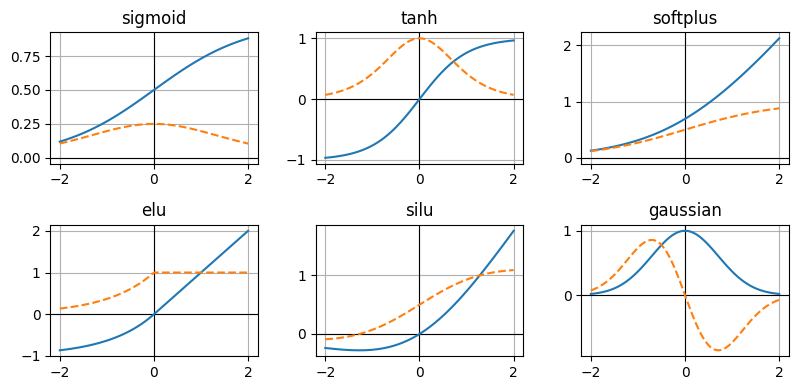

In [91]:
# Ustawienia siatki
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(8, 4))

# Tworzenie wykresów dla każdej funkcji
functions = [sigmoid, tanh, softplus, elu, silu, gaussian]
function_names = ['sigmoid', 'tanh', 'softplus', 'elu', 'silu', 'gaussian']

for i, ax in enumerate(axes.flatten()):
    x = np.linspace(-2, 2, 100)
    y = functions[i](x)
    y_derivatives = functions[i](x, pochodna=True)
    ax.axhline(0, color='black', linewidth=0.8)  
    ax.axvline(0, color='black', linewidth=0.8)
    ax.plot(x, y, linewidth=1.5)
    if y_derivatives is not None:
        ax.plot(x, y_derivatives, linewidth=1.5, linestyle='--')
    ax.set_title(function_names[i])
    ax.grid(True)

plt.tight_layout()

plt.show()


## Kod sztucznej sieci neuronowej

#### Warstwa, z metodami propagacji naprzód oraz wstecz

In [92]:
class warstwa:
    def __init__(self, liczba_wejsc, liczba_wyjsc, wspolczynnik_uczenia):
        self.x = None
        self.wagi = np.random.randn(liczba_wejsc, liczba_wyjsc) / np.sqrt(liczba_wejsc)
        rng = np.random.default_rng()
        self.bias = rng.random(liczba_wyjsc)
        self.liczba_wejsc = liczba_wejsc
        self.liczba_wyjsc = liczba_wyjsc
        self.wspolczynnik_uczenia = wspolczynnik_uczenia

    def naprzod(self, x, trening=False):
        if trening:
            self.x = x
        return np.dot(x, self.wagi) + self.bias
    
    def wstecz(self, dx):
        zmiana_wag = np.dot(self.x.T, dx)
        zmiana_biasu = np.sum(dx, axis=0)
        self.wagi = self.wagi - np.dot(self.wspolczynnik_uczenia, zmiana_wag)
        self.bias = self.bias - np.dot(self.wspolczynnik_uczenia, zmiana_biasu)
        return np.dot(dx, self.wagi.T)

#### Bramki aktywacji

In [93]:
class Sigmoid:
    def __init__(self):
        self.wyjscie = None

    def naprzod(self, x, trening=False):
        wynik = 1/(1+np.exp(-x))
        if trening:
            self.wyjscie = wynik
        return wynik
    
    def wstecz(self, dx):
        return dx * (1 - self.wyjscie) * self.wyjscie
    
class ReLU:
    def __init__(self):
        self.wyjscie = None

    def naprzod(self, x, trening=False):
        wynik = np.where(x > 0, x, 0)
        if trening:
            self.wyjscie = wynik
        return wynik
    
    def wstecz(self, dx):
        return dx * np.where(self.wyjscie > 0, 1, 0)
    
class Softplus:
    def __init__(self):
        self.wyjscie = None

    def naprzod(self, x, trening=False):
        wynik = np.log(1+np.exp(x))
        if trening:
            self.wyjscie = wynik
        return wynik
    
    def wstecz(self, dx):
        return dx * 1/(1+np.exp(-self.wyjscie))
    
class Gaussian:
    def __init__(self):
        self.wyjscie = None

    def naprzod(self, x, trening=False):
        wynik = np.exp(-x**2)
        if trening:
            self.wyjscie = wynik
        return wynik
    
    def wstecz(self, dx):
        return dx * (-2 * self.wyjscie * np.exp(-self.wyjscie**2))

### Neuron błędu

In [94]:
class MSE:
    def __init__(self):
        self.wyjscie = None
        self.x = None
        self.y = None

    def naprzod(self, x, y, trening=False):
        self.x = x
        self.y = y
        wynik = np.mean(np.power(x - y, 2))
        if trening:
            self.wyjscie = wynik
        return wynik
    
    def wstecz(self):
        return 2 * (self.x - self.y) / self.x.size

#### Perceptron, z metodami propagacji naprzód oraz wstecz
Przy propagacji naprzód przepuszcza dane wejściowe przez całą sieć, zwraca wyjście ostatniej warstwy (ostatnia warstwa jest jednym neuronem, wyjście jest jedną liczbą)
Przy propagacji wstecz oblicza błąd predykcji oraz przepuszcza go przez całą sieć, nie zwraca żadnej wartości

In [95]:
class wielowarstwowy_perceptron:
    def __init__(self, n_warstw, n_neuronow, n_wejsc, wspolczynnik_uczenia=0.01, warstwa_aktywacji=Sigmoid()):
        self.warstwy = [warstwa(n_wejsc, n_neuronow, wspolczynnik_uczenia=0)]
        for _ in range(n_warstw):
            self.warstwy.append(warstwa(n_neuronow, n_neuronow, wspolczynnik_uczenia))
            self.warstwy.append(warstwa_aktywacji)
        self.warstwy.append(warstwa(n_neuronow, 1, wspolczynnik_uczenia))
        self.warstwa_bledu = MSE()

    def naprzod(self, x, trening):
        wejscie = x
        for warstwa in self.warstwy:
            wynik = warstwa.naprzod(wejscie, trening)
            wejscie = wynik
        return wynik

    def wstecz(self, wejscie):
        blad = wejscie
        for warstwa in reversed(self.warstwy):
            wynik = warstwa.wstecz(blad)
            blad = wynik
    
    def naprzod_oblicz_blad(self, x, y, trening):
        wynik = self.naprzod(x, trening)
        return self.warstwa_bledu.naprzod(wynik, y)

### Funkcje trenowania i testowania

In [96]:
def trenuj_testuj(model, X_trening, X_test, y_trening, y_test, n_okresow, wielkosc_serii=10):

    for _ in tqdm(range(n_okresow)):
        indeksy_treningu = random.sample(range(len(X_trening)), wielkosc_serii)
        X_seria = np.array([X_trening[i] for i in indeksy_treningu])
        y_seria = np.array([y_trening[i] for i in indeksy_treningu])

        blad = model.naprzod_oblicz_blad(X_seria, y_seria, True)
        model.wstecz(blad)
    
    indeksu_walidacji = random.sample(range(len(X_test)), wielkosc_serii)
    X_test = np.array([X_test[i] for i in indeksu_walidacji])
    y_test = np.array([y_test[i] for i in indeksu_walidacji])
    blad = model.naprzod_oblicz_blad(X_test, y_test, False)
    print("Blad: {}".format(blad))
    return model.naprzod(X_test, False), blad

### Przygotowanie danych

In [97]:
housing_val = housing.dropna().values

housing_val = MinMaxScaler((-1,1)).fit_transform(housing_val)
# Podział danych na zbiór treningowy i testowy
X = housing_val[:, :-1]
y = housing_val[:, -1]
X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Przebieg testowy

In [98]:
%%capture
model = wielowarstwowy_perceptron(n_warstw=2, n_neuronow=5, n_wejsc=5, warstwa_aktywacji=ReLU())
y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, 20, 10)

# Analiza wpływu parametrów na skuteczność działania sieci

Sprawdzanie wartości błędu dla poszczególnych wartości liczby warstw, każda kombinacja parametru jest trenowana 10-krotnie (n_neuronow=5, n_wejsc=5, warstwa_aktywacji=ReLU).

In [99]:
%%capture
min_blad_list = []
warstwa_list = [1, 2, 3, 4, 5, 8]
for liczba_warstw in warstwa_list:
    blad_list = []
    while(len(blad_list)!=10): #10 razy trenowanie i testowanie sieci
        model = wielowarstwowy_perceptron(n_warstw=liczba_warstw, n_neuronow=5, n_wejsc=5,warstwa_aktywacji=ReLU())
        y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, 50, 10)
        if not np.isnan(blad):
            print(blad)
            blad_list.append(blad)
    min_blad_list.append(min(blad_list))

Najmniejsze błędy dla poszczególnych liczb warstw.

In [100]:
for z in range(len(warstwa_list)):
    print("Liczba warstw:",warstwa_list[z],"- najmniejszy błąd:",min_blad_list[z])
    
optymalna_liczba_warstw = warstwa_list[min_blad_list.index(min(min_blad_list))]

print("\nLiczba warstw osiągająca najmniejszy błąd:",optymalna_liczba_warstw)

Liczba warstw: 1 - najmniejszy błąd: 0.0683442408480558
Liczba warstw: 2 - najmniejszy błąd: 0.06268431871449491
Liczba warstw: 3 - najmniejszy błąd: 0.0614104049154877
Liczba warstw: 4 - najmniejszy błąd: 0.09490309296683541
Liczba warstw: 5 - najmniejszy błąd: 0.05006361164291314
Liczba warstw: 8 - najmniejszy błąd: 0.06668660091939682

Liczba warstw osiągająca najmniejszy błąd: 5


Sprawdzanie wartości błędu dla poszczególnych wartości liczby neuronów, każda kombinacja parametru jest trenowana 10-krotnie (n_warstw=optymalne, n_wejsc=5, warstwa_aktywacji= ReLU).

In [75]:
%%capture
min_blad_list = []
neuron_list = [1,2,3,4,5,6]
for liczba_neuronow in neuron_list:
    blad_list = []
    while(len(blad_list)!=10): #10 razy trenowanie i testowanie sieci
        model = wielowarstwowy_perceptron(n_warstw=optymalna_liczba_warstw, n_neuronow=liczba_neuronow, n_wejsc=5,warstwa_aktywacji=ReLU())
        y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, 50, 10)
        if not np.isnan(blad):
            print(blad)
            blad_list.append(blad)
    min_blad_list.append(min(blad_list))

Najmniejsze błędy dla poszczególnych liczb neuronów.

In [76]:
for z in range(len(neuron_list)):
    print("Liczba neuronów:",neuron_list[z],"- najmniejszy błąd:",min_blad_list[z])

optymalna_liczba_neuronow = neuron_list[min_blad_list.index(min(min_blad_list))]

print("\nLiczba neuronów osiągająca najmniejszy błąd:",optymalna_liczba_neuronow)

Liczba neuronów: 1 - najmniejszy błąd: 0.10164493983998982
Liczba neuronów: 2 - najmniejszy błąd: 0.06304856213050732
Liczba neuronów: 3 - najmniejszy błąd: 0.06619144880744003
Liczba neuronów: 4 - najmniejszy błąd: 0.059942414115463916
Liczba neuronów: 5 - najmniejszy błąd: 0.056588679415560346
Liczba neuronów: 6 - najmniejszy błąd: 0.07255662266216246

Liczba neuronów osiągająca najmniejszy błąd: 5


Sprawdzanie wartości błędu dla poszczególnych wielkości próby testowej, każda kombinacja parametru jest trenowana 10-krotnie (n_warstw=optymalne, n_neuronow=optymalne, n_wejsc=5,warstwa_aktywacji=ReLU).

In [77]:
%%capture
min_blad_list = []
test_list = [0.1,0.2,0.3,0.4,0.5,0.6]
for test_split in test_list:
    blad_list = []
    while(len(blad_list)!=10): #10 razy trenowanie i testowanie sieci
        model = wielowarstwowy_perceptron(n_warstw=optymalna_liczba_warstw, n_neuronow=optymalna_liczba_neuronow, n_wejsc=5,warstwa_aktywacji=ReLU())
        X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size=test_split, random_state=0)
        y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, 50, 10)
        if not np.isnan(blad):
            print(blad)
            blad_list.append(blad)
    min_blad_list.append(min(blad_list))


Najmniejsze błędy dla poszczególnych wielkości próby testowej.

In [78]:
for z in range(len(test_list)):
    print("Wielkość próby testowej jako proporcja:",test_list[z],"- najmniejszy błąd:",min_blad_list[z])

optymalna_wielkosc_proby_testowej = test_list[min_blad_list.index(min(min_blad_list))]

print("\nWielkość próby testowej osiągająca najmniejszy błąd:",optymalna_wielkosc_proby_testowej)

Wielkość próby testowej jako proporcja: 0.1 - najmniejszy błąd: 0.04644489031366061
Wielkość próby testowej jako proporcja: 0.2 - najmniejszy błąd: 0.04119033393502782
Wielkość próby testowej jako proporcja: 0.3 - najmniejszy błąd: 0.05197221776049913
Wielkość próby testowej jako proporcja: 0.4 - najmniejszy błąd: 0.042056618398840805
Wielkość próby testowej jako proporcja: 0.5 - najmniejszy błąd: 0.053093359850560934
Wielkość próby testowej jako proporcja: 0.6 - najmniejszy błąd: 0.06645802552518741

Wielkość próby testowej osiągająca najmniejszy błąd: 0.2


Sprawdzanie wartości błędu dla poszczególnych liczby okresów, każda kombinacja parametru jest trenowana 10-krotnie (n_neuronow=optymalne, n_warstw=optymalne, n_wejsc=5, warstwa_aktywacji=ReLU).

In [79]:
%%capture
min_blad_list = []
okresy_list = [5,10,20,30,40,50]
for okres in okresy_list:
    blad_list = []
    while(len(blad_list)!=10): #10 razy trenowanie i testowanie sieci
        model = wielowarstwowy_perceptron(n_warstw=optymalna_liczba_warstw, n_neuronow=optymalna_liczba_neuronow, n_wejsc=5,warstwa_aktywacji=ReLU())
        X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size=optymalna_wielkosc_proby_testowej, random_state=0)
        y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, okres, 10)
        if not np.isnan(blad):
            print(blad)
            blad_list.append(blad)
    min_blad_list.append(min(blad_list))

Najmniejsze błędy dla poszczególnych liczb okresów.

In [80]:
for z in range(len(okresy_list)):
    print("Liczba okresów:",okresy_list[z],"- najmniejszy błąd:",min_blad_list[z])

optymalny_okres = okresy_list[min_blad_list.index(min(min_blad_list))]

print("\nLiczba okresów osiągająca najmniejszy błąd:",optymalny_okres)

Liczba okresów: 5 - najmniejszy błąd: 0.10648131929614073
Liczba okresów: 10 - najmniejszy błąd: 0.06289501149620515
Liczba okresów: 20 - najmniejszy błąd: 0.05970652208354766
Liczba okresów: 30 - najmniejszy błąd: 0.09047198785994301
Liczba okresów: 40 - najmniejszy błąd: 0.06888306869912139
Liczba okresów: 50 - najmniejszy błąd: 0.07251823493562236

Liczba okresów osiągająca najmniejszy błąd: 20


Sprawdzanie wartości błędu dla poszczególnych funkcji aktywacja, każda kombinacja parametru jest trenowana 10-krotnie (n_neuronow=optymalne, n_warstw=optymalne, n_wejsc=5).

In [81]:
%%capture
min_blad_list = []
aktywacja_list = [ReLU(),Softplus(),Sigmoid(), Gaussian()]
#warstwa_list = [1, 2, 3, 4, 5, 8]
for aktywacja in aktywacja_list:
    blad_list = []
    while(len(blad_list)!=10): #10 razy trenowanie i testowanie sieci
        model = wielowarstwowy_perceptron(n_warstw=optymalna_liczba_warstw, n_neuronow=optymalna_liczba_neuronow, n_wejsc=5,warstwa_aktywacji=aktywacja)
        X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size=optymalna_wielkosc_proby_testowej, random_state=0)
        y_pred, blad= trenuj_testuj(model, X_trening, X_test, y_trening, y_test, optymalny_okres, 10)
        if not np.isnan(blad):
            print(blad)
            blad_list.append(blad)
    min_blad_list.append(min(blad_list))

Najmniejsze błędy dla poszczególnych funkcji aktywacji.

In [82]:
for z in range(len(aktywacja_list)):
    print("Funkcja aktywacji:",aktywacja_list[z].__class__.__name__,"- najmniejszy błąd:",min_blad_list[z])

optymalna_funkcja_aktywacji = aktywacja_list[min_blad_list.index(min(min_blad_list))]

print("\nWarstwa aktywacji osiągająca najmniejszy błąd:",optymalna_funkcja_aktywacji.__class__.__name__)

Funkcja aktywacji: ReLU - najmniejszy błąd: 0.03716118805219249
Funkcja aktywacji: Softplus - najmniejszy błąd: 0.053570123840524966
Funkcja aktywacji: Sigmoid - najmniejszy błąd: 0.04700589129261976
Funkcja aktywacji: Gaussian - najmniejszy błąd: 0.042066794762273506

Warstwa aktywacji osiągająca najmniejszy błąd: ReLU


Dla kombinacji parametrów: 

In [83]:
print("Liczba warstw:",optymalna_liczba_warstw)
print("Liczba neuronów:",optymalna_liczba_neuronow)
print("Wielkość próby testowej:",optymalna_wielkosc_proby_testowej)
print("Liczba okresów:",optymalny_okres)
print("Warstwa aktywacji:",optymalna_funkcja_aktywacji.__class__.__name__)

Liczba warstw: 8
Liczba neuronów: 5
Wielkość próby testowej: 0.2
Liczba okresów: 20
Warstwa aktywacji: ReLU


Wartość MSE wynosi:

In [84]:
print(min(min_blad_list))

0.03716118805219249


Wartość MSE uzyskana w wyniku regresji liniowej wynosiła 0.428395528445253.